In [59]:
ls runs

bay006/  bay007/  bay-v01-201706/  bay-v01-201707/  to_delete-bay-v02-201706/


In [60]:
import xarray as xr
import matplotlib.pyplot as plt
from stompy.grid import unstructured_grid
import numpy as np
%matplotlib notebook

In [120]:
ds=xr.open_dataset('runs/bay-v01-201706/Estuary_SUNTANS.nc.nc.5')

In [4]:
ds.limiting_cell.max()

<xarray.DataArray 'limiting_cell' ()>
array(84825, dtype=int32)

In [6]:
g=unstructured_grid.UnstructuredGrid.from_ugrid(ds)

In [79]:
six.moves.reload_module(utils)

<module 'stompy.utils' from '/home/rusty/src/stompy/stompy/utils.py'>

In [121]:
from stompy.model.suntans import sun_driver
import six
six.moves.reload_module(sun_driver)

<module 'stompy.model.suntans.sun_driver' from '/home/rusty/src/stompy/stompy/model/suntans/sun_driver.py'>

In [122]:
model=sun_driver.SuntansModel.load("runs/bay-v01-201706")


INFO:UnstructuredGrid:Will flip 0 edges


In [123]:
model_r=sun_driver.SuntansModel.load("runs/bay-v01-201707")


INFO:UnstructuredGrid:Will flip 0 edges


In [124]:
map_fn=model.map_outputs()[5]
map_ds=xr.open_dataset(map_fn)
g5=model.subdomain_grid(5)


<IPython.core.display.Javascript object>


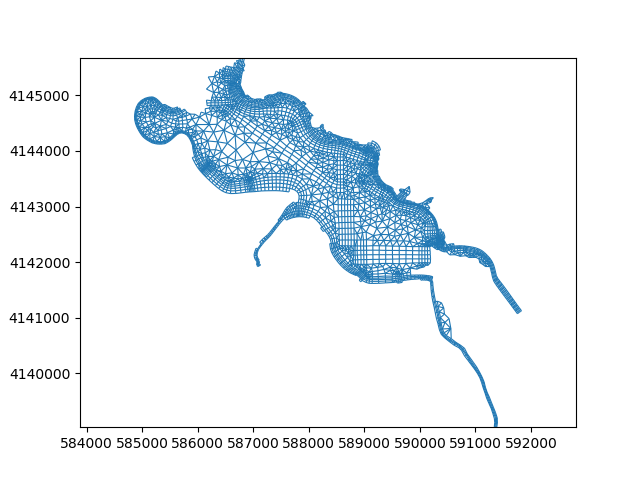

In [125]:
plt.figure()
g5.plot_edges()

In [126]:
pdata=model.monitor_output()
pdata_r=model_r.monitor_output()

# Real times not yet in the driver script, so try to add them manually
#def add_prof_time(model,prof):
#    dt_prof=np.timedelta64( int( prof['ntout_profs']*prof['dt']*1e6),'us')
#    prof['time']=('time',),(model.run_start + dt_prof*np.arange(prof.dims['time']))
#add_prof_time(model,pdata)
#add_prof_time(model_restart,pdata_r)


In [127]:
alviso=[588588,4.14416e6] # Alviso
coyote=[586282,4.14676e6]  # Coyote
a8=[590282,4.14234e6]
target=a8
prof=pdata.closest_to(target)
prof_r=pdata_r.closest_to(target)

<IPython.core.display.Javascript object>


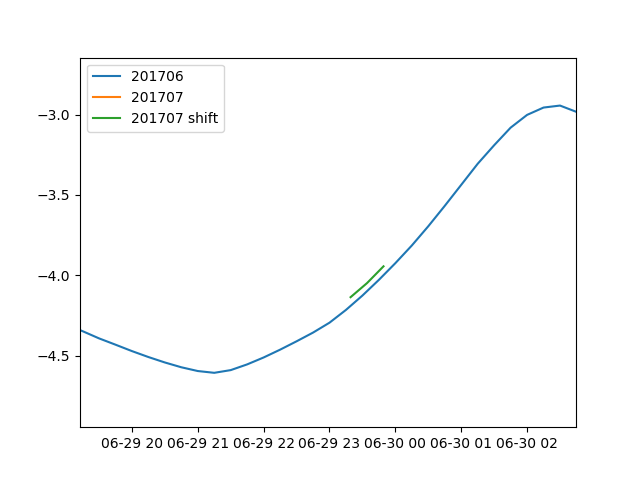

(736509.8004911761, 736510.1142803887, -4.946352528202269, -2.6447709342808325)

In [128]:
plt.figure()
plt.plot(prof.time,prof['eta'],label='201706')
plt.plot(prof_r.time,prof_r['eta'],label='201707')
plt.plot(prof_r.time-np.timedelta64(int(3600*24.68),'s'),
         prof_r['eta'],label='201707 shift')
plt.legend()
plt.axis((736509.8004911761, 736510.1142803887, -4.946352528202269, -2.6447709342808325))

In [109]:
plt.axis()

(736509.8004911761, 736510.1142803887, -4.946352528202269, -2.6447709342808325)

<IPython.core.display.Javascript object>


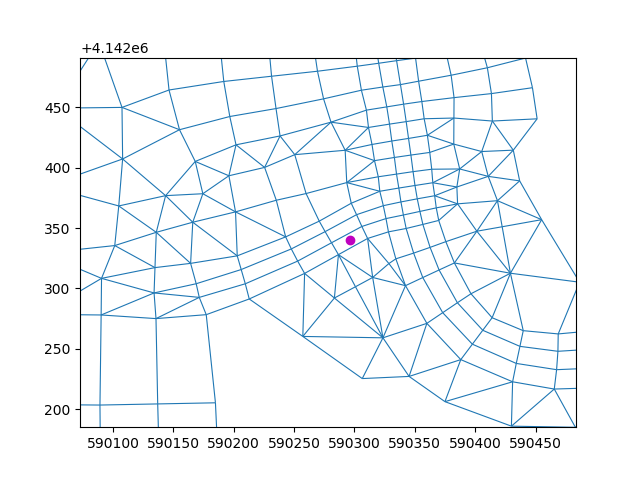

In [111]:
plt.figure()
g5.plot_edges()
plt.plot(pdata.prof_xy.values[:,0],
         pdata.prof_xy.values[:,1],
        'mo')

In [129]:
# Plot near the end of the first run, see if flow is choked off in Alviso.
map_ds

plt.figure()


<xarray.Dataset>
Dimensions:        (Nc: 3509, Ne: 5935, Nk: 30, Nkw: 31, Np: 44200, Two: 2, numsides: 6, time: 61)
Coordinates:
    xv             (Nc) float64 ...
    yv             (Nc) float64 ...
    xe             (Ne) float64 ...
    ye             (Ne) float64 ...
    z_r            (Nk) float64 ...
    z_w            (Nkw) float64 ...
    Nk             (Nc) int32 ...
  * time           (time) datetime64[ns] 2017-06-01T00:00:05 ... 2017-07-01
Dimensions without coordinates: Nc, Ne, Nkw, Np, Two, numsides
Data variables:
    suntans_mesh   int32 ...
    cells          (Nc, numsides) int32 ...
    face           (Nc, numsides) int32 ...
    nfaces         (Nc) int32 ...
    edges          (Ne, Two) int32 ...
    neigh          (Nc, numsides) int32 ...
    grad           (Ne, Two) int32 ...
    gradf          (Ne, Two) int32 ...
    mark           (Ne) int32 ...
    mnptr          (Nc) int32 ...
    eptr           (Ne) int32 ...
    xp             (Np) float64 ...
    yp         

In [53]:
pdata # dt=5.0, ntoutProfs=180  nsteps=535680.  time is 2880
535680/180.

2976.0

In [57]:
pdata['nsteps'].item() - 2880*180. # this matches what's in suntans.dat for nsteps, but somehow *not* what's in pdata.

# off by 17280 steps, which at dt=1.0, is exactly one day.
# 

17280.0

In [58]:
17280 *5

86400